Data Preprocessing and Setup

In [2]:
# setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

#import datsets
temps_data = pd.read_csv('Temperatures.csv')
precipitation_data = pd.read_csv('Precipitation.csv')
corn_price_data = pd.read_csv('US_Corn_Futures.csv')

#convert data into numpy arrays
temps = temps_data.iloc[:, -1].values
precipitation = precipitation_data.iloc[:, -1].values
weather = np.column_stack((temps, precipitation))

corn_price = corn_price_data.iloc[1:, 1].values
corn_open = np.flip(corn_price_data.iloc[1:, 2].values)
corn_high = np.flip(corn_price_data.iloc[1:, 3].values)
corn_low = np.flip(corn_price_data.iloc[1:, 4].values)

#Reshape arrays so that they are in correct format
temps = temps.reshape(len(temps), 1)
precipitation = precipitation.reshape(len(precipitation), 1)

corn_price = corn_price.reshape(len(corn_price), 1)
corn_open = corn_open.reshape(len(corn_open), 1)
corn_high = corn_high.reshape(len(corn_high), 1)
corn_low = corn_low.reshape(len(corn_low), 1)


In [3]:
#Split data into training and test
from sklearn.model_selection import train_test_split
temps_train, temps_test = train_test_split(temps, test_size = 0.2)
precipitation_train, precipitation_test = train_test_split(precipitation, test_size = 0.2)
weather_train, weather_test = train_test_split(weather, test_size = 0.2)

corn_price_train, corn_price_test = train_test_split(corn_price, test_size = 0.2)
corn_open_train, corn_open_test = train_test_split(corn_open, test_size = 0.2)
corn_high_train, corn_high_test = train_test_split(corn_high, test_size = 0.2)
corn_low_train, corn_low_test = train_test_split(corn_low, test_size = 0.2)

#This can be changed easily if we want to run regression on the open/high/low price
y_train = corn_price_train
y_test = corn_price_test

Simple Linear Regression for Temperature and Precipitation

In [4]:
from sklearn.linear_model import LinearRegression

#Fit the model
temperature_regressor = LinearRegression()
precipitation_regressor = LinearRegression()
temperature_regressor.fit(temps_train, y_train)
precipitation_regressor.fit(precipitation_train, y_train)

LinearRegression()

In [5]:
#Get predicted values
y_pred_temps = temperature_regressor.predict(temps_test)
y_pred_precipitation = temperature_regressor.predict(precipitation_test)

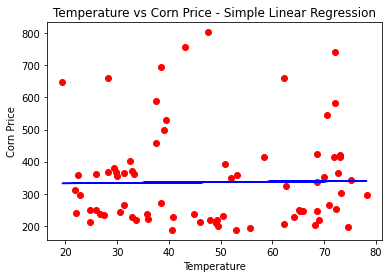

In [6]:
#Plot temperature predictions
plt.scatter(temps_test, y_test, color = 'red')
plt.plot(temps_test, y_pred_temps, color = 'blue')
plt.title('Temperature vs Corn Price - Simple Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Corn Price')
plt.show()

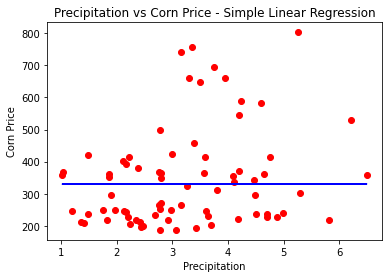

In [7]:
#Plot precipitation predictions
plt.scatter(precipitation_test, y_test, color = 'red')
plt.plot(precipitation_test, y_pred_precipitation, color = 'blue')
plt.title('Precipitation vs Corn Price - Simple Linear Regression')
plt.xlabel('Precipitation')
plt.ylabel('Corn Price')
plt.show()

In [8]:
# Evaluating the models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# r2 score of models
temp_r2 = r2_score(y_test, y_pred_temps)
precipitation_r2 = r2_score(y_test, y_pred_precipitation)

#mean squared error of models
temp_mse = mean_squared_error(y_test,  y_pred_temps)
precipitation_mse = mean_squared_error(y_test, y_pred_precipitation)

temp_rmse = sqrt(temp_mse)
precipitation_rmse = sqrt(precipitation_mse)

#mean absolute error of each model
temp_mae = mean_absolute_error(y_test,  y_pred_temps)
precipitation_mae = mean_absolute_error(y_test, y_pred_precipitation)

In [9]:
#Print model evaluation
print('R2 values for temperature and precipitation - Simple Linear Regression')
print(temp_r2)
print(precipitation_r2)

print('Mean Squared Error values for temperature and precipitation - Simple Linear Regression')
print(temp_mse)
print(precipitation_mse)

print('Root of Mean Squared Error for temperature and precipitation - Simple Linear Regression')
print(temp_rmse)
print(precipitation_rmse)

print('Mean Absolute Error values for temperature and precipitation - Simple Linear Regression')
print(temp_mae)
print(precipitation_mae)

R2 values for temperature and precipitation - Simple Linear Regression
-0.004500208678443807
-0.010365463286520216
Mean Squared Error values for temperature and precipitation - Simple Linear Regression
22929.256648494164
23063.140073361028
Root of Mean Squared Error for temperature and precipitation - Simple Linear Regression
151.4240953365552
151.86553286826154
Mean Absolute Error values for temperature and precipitation - Simple Linear Regression
114.6219274078617
114.17716795131695


Multiple Linear Regression with temperature and Precipitation

In [10]:
# Build the model on all the weather data and predict results
weather_regressor = LinearRegression()
weather_regressor.fit(weather_train, y_train)

y_pred_weather = weather_regressor.predict(weather_test)

In [11]:
# Evaluating the model

# r2 score of model
weather_r2 = r2_score(y_test, y_pred_weather)

#mean squared error of model
weather_mse = mean_squared_error(y_test, y_pred_weather)
weather_rmse = sqrt(weather_mse)

#mean absolute error of model
weather_mae = mean_absolute_error(y_test, y_pred_weather)

In [12]:
#Print model evaluation
print('R2 values for weather - Multiple Linear Regression')
print(weather_r2)

print('Mean Squared Error values for weather - Multiple Linear Regression')
print(weather_mse)

print('Root of Mean Squared Error for weather - Multiple Linear Regression')
print(weather_rmse)

print('Mean Absolute Error values for weather - Multiple Linear Regression')
print(weather_mae)

R2 values for weather - Multiple Linear Regression
0.00893519391891029
Mean Squared Error values for weather - Multiple Linear Regression
22622.572994604358
Root of Mean Squared Error for weather - Multiple Linear Regression
150.40802170962942
Mean Absolute Error values for weather - Multiple Linear Regression
112.39300808818038


Polynomial regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures

#Create the vandermonde matrices for polynomial regression
#We can experiment to find best degree
poly = PolynomialFeatures(degree=3)

temp_train_poly = poly.fit_transform(temps_train)
precip_train_poly = poly.fit_transform(precipitation_train)
weather_train_poly = poly.fit_transform(weather_train)

In [14]:
#Build the polynomial models
temp_polyreg = LinearRegression()
temp_polyreg.fit(temp_train_poly, y_train)

precip_polyreg = LinearRegression()
precip_polyreg.fit(precip_train_poly, y_train)

weather_polyreg = LinearRegression()
weather_polyreg.fit(weather_train_poly, y_train)

LinearRegression()

In [15]:
#Get the predictions
y_pred_temps = temp_polyreg.predict(poly.fit_transform(temps_test))
y_pred_precipitation = precip_polyreg.predict(poly.fit_transform(precipitation_test))
y_pred_weather =  weather_polyreg.predict(poly.fit_transform(weather_test))

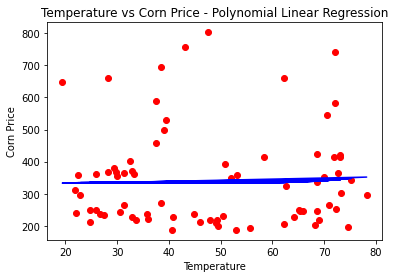

In [16]:
#Plot the temperature polynomial regression
plt.scatter(temps_test, y_test, color = 'red')
plt.plot(temps_test, temp_polyreg.predict(poly.fit_transform(temps_test)), color = 'blue')
plt.title('Temperature vs Corn Price - Polynomial Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Corn Price')
plt.show()

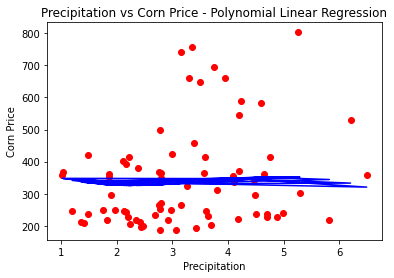

In [17]:
#Plot the precipitation polynomial regression
plt.scatter(precipitation_test, y_test, color = 'red')
plt.plot(precipitation_test, precip_polyreg.predict(poly.fit_transform(precipitation_test)), color = 'blue')
plt.title('Precipitation vs Corn Price - Polynomial Linear Regression')
plt.xlabel('Precipitation')
plt.ylabel('Corn Price')
plt.show()

In [18]:
# Evaluating the model

# r2 score of model
temp_r2 = r2_score(y_test, y_pred_temps)
precipitation_r2 = r2_score(y_test, y_pred_precipitation)
weather_r2 = r2_score(y_test, y_pred_weather)

#mean squared error of model
temp_mse = mean_squared_error(y_test, y_pred_temps)
precipitation_mse = mean_squared_error(y_test, y_pred_precipitation)
weather_mse = mean_squared_error(y_test, y_pred_weather)

temp_rmse = sqrt(temp_mse)
precipitation_rmse = sqrt(precipitation_mse)
weather_rmse = sqrt(weather_mse)

#mean absolute error of model
temp_mae = mean_absolute_error(y_test, y_pred_temps)
precipitation_mae = mean_absolute_error(y_test, y_pred_precipitation)
weather_mae = mean_absolute_error(y_test, y_pred_weather)


In [19]:
#Print model evaluation
print('R2 values for predictions - Polynomial Linear Regression')
print(temp_r2)
print(precipitation_r2)
print(weather_r2)

print('Mean Squared Error values for predictions - Polynomial Linear Regression')
print(temp_mse)
print(precipitation_mse)
print(weather_mse)

print('Root of Mean Squared Error for predictions - Polynomial Linear Regression')
print(temp_rmse)
print(precipitation_rmse)
print(weather_rmse)

print('Mean Absolute Error values for predictions - Polynomial Linear Regression')
print(temp_mae)
print(precipitation_mae)
print(weather_mae)

R2 values for predictions - Polynomial Linear Regression
-0.001850827131589572
0.01582439772205424
0.030209917601530467
Mean Squared Error values for predictions - Polynomial Linear Regression
22868.780454539432
22465.316360169316
22136.944823270896
Root of Mean Squared Error for predictions - Polynomial Linear Regression
151.22427204169122
149.884343278974
148.78489447276192
Mean Absolute Error values for predictions - Polynomial Linear Regression
114.41649554315399
113.96892552499645
109.86372947286176


Ridge Regression

In [20]:
#Build the ridge regression model
from sklearn.linear_model import Ridge
alph = 1

temp_reg = Ridge(alpha=alph)
temp_reg.fit(temps_train, y_train)

precipitation_reg = Ridge(alpha=alph)
precipitation_reg.fit(precipitation_train, y_train)

weather_reg = Ridge(alpha=alph)
weather_reg.fit(weather_train, y_train)

Ridge(alpha=1)

In [21]:
#Make the predictions
y_pred_temps = temp_reg.predict(temps_test)
y_pred_precipitation = precipitation_reg.predict(precipitation_test)
y_pred_weather =  weather_reg.predict(weather_test)

In [22]:
# Evaluating the model

# r2 score of model
temp_r2 = r2_score(y_test, y_pred_temps)
precipitation_r2 = r2_score(y_test, y_pred_precipitation)
weather_r2 = r2_score(y_test, y_pred_weather)

#mean squared error of model
temp_mse = mean_squared_error(y_test, y_pred_temps)
precipitation_mse = mean_squared_error(y_test, y_pred_precipitation)
weather_mse = mean_squared_error(y_test, y_pred_weather)

temp_rmse = sqrt(temp_mse)
precipitation_rmse = sqrt(precipitation_mse)
weather_rmse = sqrt(weather_mse)

#mean absolute error of model
temp_mae = mean_absolute_error(y_test, y_pred_temps)
precipitation_mae = mean_absolute_error(y_test, y_pred_precipitation)
weather_mae = mean_absolute_error(y_test, y_pred_weather)

In [23]:
#Print model evaluation
print('R2 values for predictions - Ridge Regression')
print(temp_r2)
print(precipitation_r2)
print(weather_r2)

print('Mean Squared Error values for predictions - Ridge Regression')
print(temp_mse)
print(precipitation_mse)
print(weather_mse)

print('Root of Mean Squared Error for predictions - Ridge Regression')
print(temp_rmse)
print(precipitation_rmse)
print(weather_rmse)

print('Mean Absolute Error values for predictions - Ridge Regression')
print(temp_mae)
print(precipitation_mae)
print(weather_mae)

R2 values for predictions - Ridge Regression
-0.004500203414144144
0.008926011280211754
0.008952285274943073
Mean Squared Error values for predictions - Ridge Regression
22929.256528328457
22622.782602404946
22622.182858210595
Root of Mean Squared Error for predictions - Ridge Regression
151.42409493976993
150.4087185052946
150.40672477722063
Mean Absolute Error values for predictions - Ridge Regression
114.6219269576318
114.08843537270957
112.39231381254072


Support Vector Regression

In [24]:
# Support Vector Regression requires feature scaling for accurate predictions
# Pretty much just standardizing the data so it's all in the bound [-3, 3]
from sklearn.preprocessing import StandardScaler

sc_temps = StandardScaler()
sc_precipitation = StandardScaler()
sc_weather = StandardScaler()
sc_y = StandardScaler()

temps_scaled = sc_temps.fit_transform(temps_train)
precipitation_scaled = sc_precipitation.fit_transform(precipitation_train)
weather_scaled = sc_weather.fit_transform(weather_train)
y_scaled = sc_y.fit_transform(y_train)

In [25]:
#Building the model using the radial basis function kernel in SVR
#Not really sure how the radial basis function kernel works but it does regression
#polynomially and is supposed to be the most popular. We can experiment with other kernels
from sklearn.svm import SVR
temps_reg = SVR(kernel = 'rbf')
precipitation_reg = SVR(kernel = 'rbf')
weather_reg = SVR(kernel = 'rbf')

temps_reg.fit(temps_scaled, y_scaled)
precipitation_reg.fit(precipitation_scaled, y_scaled)
weather_reg.fit(weather_scaled, y_scaled)

C:\Users\gabek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\gabek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\gabek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [26]:
# Get the predictions
y_pred_temps = sc_y.inverse_transform(temps_reg.predict(sc_temps.fit_transform(temps_test)))
y_pred_precipitation = sc_y.inverse_transform(precipitation_reg.predict(sc_precipitation.fit_transform(precipitation_test)))
y_pred_weather =  sc_y.inverse_transform(weather_reg.predict(sc_weather.fit_transform(weather_test)))

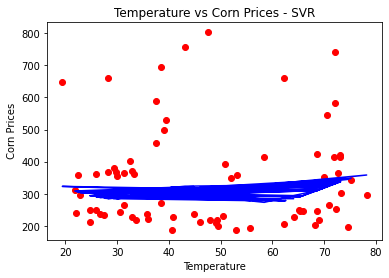

In [27]:
#Plot the temperature results
plt.scatter(temps_test, y_test, color = 'red')
plt.plot(temps_test, sc_y.inverse_transform(temps_reg.predict(sc_temps.fit_transform(temps_test))), color = 'blue')
plt.title('Temperature vs Corn Prices - SVR')
plt.xlabel('Temperature')
plt.ylabel(' Corn Prices')
plt.show()

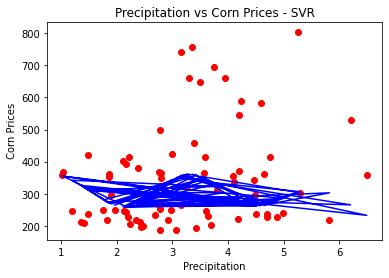

In [28]:
#Plot the precipitation results
plt.scatter(precipitation_test, y_test, color = 'red')
plt.plot(precipitation_test, sc_y.inverse_transform(precipitation_reg.predict(sc_precipitation.fit_transform(precipitation_test))), color = 'blue')
plt.title('Precipitation vs Corn Prices - SVR')
plt.xlabel('Precipitation')
plt.ylabel(' Corn Prices')
plt.show()

In [29]:
# Evaluating the model

# r2 score of model
temp_r2 = r2_score(y_test, y_pred_temps)
precipitation_r2 = r2_score(y_test, y_pred_precipitation)
weather_r2 = r2_score(y_test, y_pred_weather)

#mean squared error of model
temp_mse = mean_squared_error(y_test, y_pred_temps)
precipitation_mse = mean_squared_error(y_test, y_pred_precipitation)
weather_mse = mean_squared_error(y_test, y_pred_weather)

temp_rmse = sqrt(temp_mse)
precipitation_rmse = sqrt(precipitation_mse)
weather_rmse = sqrt(weather_mse)

#mean absolute error of model
temp_mae = mean_absolute_error(y_test, y_pred_temps)
precipitation_mae = mean_absolute_error(y_test, y_pred_precipitation)
weather_mae = mean_absolute_error(y_test, y_pred_weather)

In [30]:
#Print model evaluation
print('R2 values for predictions - Support Vector Regression')
print(temp_r2)
print(precipitation_r2)
print(weather_r2)

print('Mean Squared Error values for predictions - Support Vector Regression')
print(temp_mse)
print(precipitation_mse)
print(weather_mse)

print('Root of Mean Squared Error for predictions - Support Vector Regression')
print(temp_rmse)
print(precipitation_rmse)
print(weather_rmse)

print('Mean Absolute Error values for predictions - Support Vector Regression')
print(temp_mae)
print(precipitation_mae)
print(weather_mae)

R2 values for predictions - Support Vector Regression
-0.04303962941053108
-0.05279782900509988
-0.07184802398864609
Mean Squared Error values for predictions - Support Vector Regression
23808.97798793811
24031.723848016598
24466.573742728182
Root of Mean Squared Error for predictions - Support Vector Regression
154.3015812878731
155.02168831494708
156.41794571828444
Mean Absolute Error values for predictions - Support Vector Regression
112.5864310189541
113.0239337654178
107.19006566498541


Decision Tree Regression

In [31]:
#build models with decision tree regression
from sklearn.tree import DecisionTreeRegressor

temps_reg = DecisionTreeRegressor()
precipitation = DecisionTreeRegressor()
weather_reg = DecisionTreeRegressor()

temps_reg.fit(temps_train, y_train)
precipitation_reg.fit(precipitation_train, y_train)
weather_reg.fit(weather_train, y_train)

C:\Users\gabek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


DecisionTreeRegressor()

In [32]:
# Get the predictions
y_pred_temps = temps_reg.predict(temps_test)
y_pred_precipitation = precipitation_reg.predict(precipitation_test)
y_pred_weather =  weather_reg.predict(weather_test)

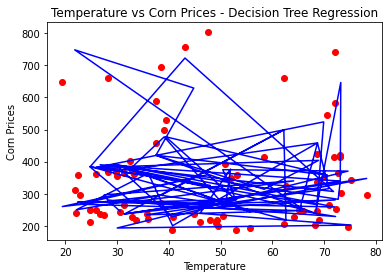

In [33]:
#plot temperature decision tree results
plt.scatter(temps_test, y_test, color = 'red')
plt.plot(temps_test, temps_reg.predict(temps_test), color = 'blue')
plt.title('Temperature vs Corn Prices - Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Corn Prices')
plt.show()

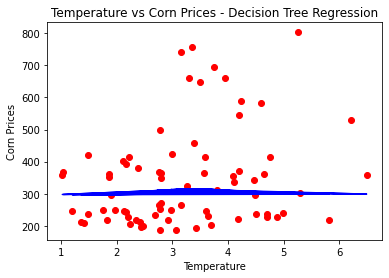

In [34]:
#plot precipitation decision tree results
plt.scatter(precipitation_test, y_test, color = 'red')
plt.plot(precipitation_test, precipitation_reg.predict(precipitation_test), color = 'blue')
plt.title('Temperature vs Corn Prices - Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Corn Prices')
plt.show()

In [35]:
# Evaluating the model

# r2 score of model
temp_r2 = r2_score(y_test, y_pred_temps)
precipitation_r2 = r2_score(y_test, y_pred_precipitation)
weather_r2 = r2_score(y_test, y_pred_weather)

#mean squared error of model
temp_mse = mean_squared_error(y_test, y_pred_temps)
precipitation_mse = mean_squared_error(y_test, y_pred_precipitation)
weather_mse = mean_squared_error(y_test, y_pred_weather)

temp_rmse = sqrt(temp_mse)
precipitation_rmse = sqrt(precipitation_mse)
weather_rmse = sqrt(weather_mse)

#mean absolute error of model
temp_mae = mean_absolute_error(y_test, y_pred_temps)
precipitation_mae = mean_absolute_error(y_test, y_pred_precipitation)
weather_mae = mean_absolute_error(y_test, y_pred_weather)

In [36]:
#Print model evaluation
print('R2 values for predictions - Decision Tree Regression')
print(temp_r2)
print(precipitation_r2)
print(weather_r2)

print('Mean Squared Error values for predictions - Decision Tree Regression')
print(temp_mse)
print(precipitation_mse)
print(weather_mse)

print('Root of Mean Squared Error for predictions - Decision Tree Regression')
print(temp_rmse)
print(precipitation_rmse)
print(weather_rmse)

print('Mean Absolute Error values for predictions - Decision Tree Regression')
print(temp_mae)
print(precipitation_mae)
print(weather_mae)

R2 values for predictions - Decision Tree Regression
-0.23072411791737157
-0.05326945746703049
-0.7748064313485521
Mean Squared Error values for predictions - Decision Tree Regression
28093.1640625
24042.48949042554
40512.676666666666
Root of Mean Squared Error for predictions - Decision Tree Regression
167.6101550100709
155.05640744717886
201.27761094236652
Mean Absolute Error values for predictions - Decision Tree Regression
117.77
112.25283550475605
140.5
